In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate, stats
import itertools 

import time

import networkx as nx
from networkx.algorithms import approximation as apx

import pandas as pd
import random

import landscape as ld
import steiner_utils as su

In [3]:
def get_pos(g):
    '''returns dictionary with nodes physical location'''
    return dict( (n, n) for n in g.nodes() )

# Example 1

## Naive Steiner

In [4]:
terminals_1 = [(1, 1), (2, 2), (3, 4), (5, 1), (5, 4), (8, 2), (7, 8), (6,  6), (2,8), (4,3)]
G_1 = su.create_graph(box_size = 10, terminals = terminals_1)

In [7]:
#su.graph_info(G_1, verbosity = True)

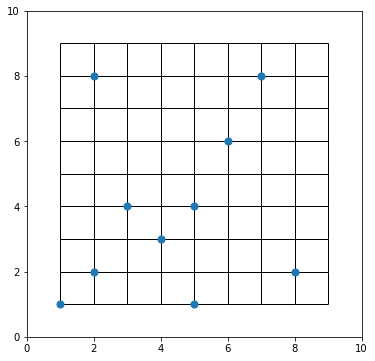

In [8]:
su.plot_graph_on_grid(G_1, box_size = 10)

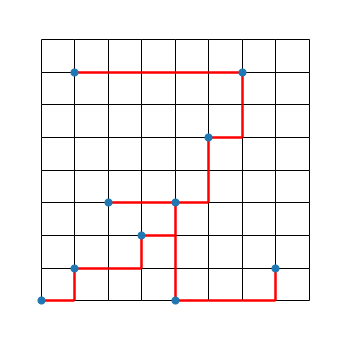

In [9]:
steiner_1 = su.naive_steiner(G_1)
su.plot_graph_on_grid(G_1, box_size = 10, tree = steiner_1)

## Improved Steiner

In [10]:
# create graph with terminals
terminals_1 = [(1, 1), (2, 2), (3, 4), (5, 1), (5, 4), (8, 2), (7, 8), (6,  6), (2,8), (4,3)]
G_1 = su.create_graph(box_size = 10, terminals = terminals_1)

In [11]:
# obtain clusters by using landscape and condition on subgraphs 
clusters_1 = su.trim_graph_landscape(G_1, 
                                     box_size = 10, 
                                     condition = 'n_clusters <= 2', 
                                     sigma = 1, 
                                     verbosity = True)

Properties of the original graph: 
Number of clusters: 1; Number of nodes: 81; Number of edges: 144; Number of terminals: 10
For alpha =  0.01
Number of clusters: 7; Number of nodes: 15; Number of edges: 11; Number of terminals: 10
For alpha =  0.03
Number of clusters: 3; Number of nodes: 49; Number of edges: 62; Number of terminals: 10
For alpha =  0.05
Number of clusters: 3; Number of nodes: 60; Number of edges: 89; Number of terminals: 10
For alpha =  0.06999999999999999
Number of clusters: 2; Number of nodes: 60; Number of edges: 92; Number of terminals: 10
Trimming condition fulfilled!
Number of clusters: 2; Number of nodes: 60; Number of edges: 92; Number of terminals: 10


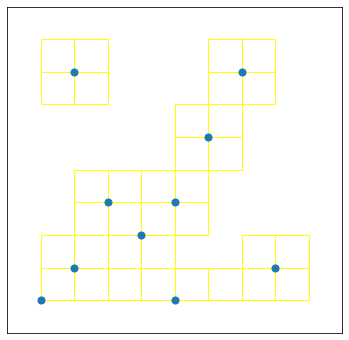

In [12]:
su.plot_many_graphs_on_grid(clusters_1, box_size = 10, fig_size = 6)

In [13]:
# # compute partial steiners
partial_steiners = list(map(su.naive_steiner, clusters_1))

# #join steiners
full_steiner_1 = su.join_all_trees(G_1, partial_steiners)

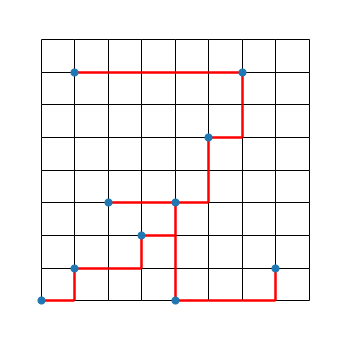

In [14]:
su.plot_graph_on_grid(G_1, box_size = 10, tree = full_steiner_1)

# Example 2
Points selected at random. 

In [15]:
L0 = 40; Nterm = 120
terminals_2 = su.make_random_terminals(box_size = L0, Nterminals = Nterm)

G_2 = su.create_graph(box_size = L0, terminals = terminals_2)
_ = su.graph_info(G_2, verbosity = True)

Number of clusters: 1; Number of nodes: 1521; Number of edges: 2964; Number of terminals: 108


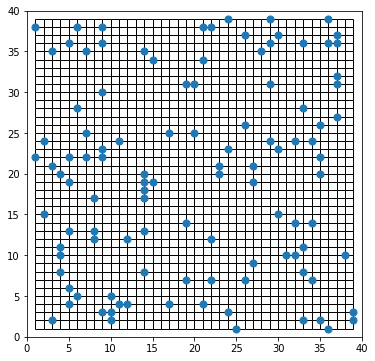

In [16]:
su.plot_graph_on_grid(G_2, box_size = L0)

In [17]:
tic = time.time()
steiner_2 = su.naive_steiner(G_2)

toc = time.time()
print('Calculation took {} sec'.format(toc-tic))
print('Length of Steiner tree {}'.format(len(steiner_2)))  

Calculation took 29.55510926246643 sec
Length of Steiner tree 318


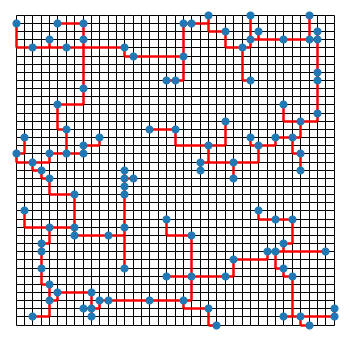

In [19]:
su.plot_graph_on_grid(G_2, box_size = L0, tree = steiner_2)

In [173]:
#import multiprocessing as mp

In [22]:
clusters_2 = su.trim_graph_landscape(G_2,
                                     box_size = L0, 
                                     condition = 'n_clusters <= 8', 
                                     sigma = 1.3,
                                     verbosity = True)

Properties of the original graph: 
Number of clusters: 1; Number of nodes: 1521; Number of edges: 2964; Number of terminals: 108
For alpha =  0.01
Number of clusters: 69; Number of nodes: 225; Number of edges: 182; Number of terminals: 108
For alpha =  0.03
Number of clusters: 33; Number of nodes: 715; Number of edges: 1050; Number of terminals: 108
For alpha =  0.05
Number of clusters: 26; Number of nodes: 871; Number of edges: 1252; Number of terminals: 108
For alpha =  0.06999999999999999
Number of clusters: 12; Number of nodes: 925; Number of edges: 1349; Number of terminals: 108
For alpha =  0.09
Number of clusters: 12; Number of nodes: 966; Number of edges: 1455; Number of terminals: 108
For alpha =  0.11
Number of clusters: 9; Number of nodes: 1130; Number of edges: 1655; Number of terminals: 108
For alpha =  0.13
Number of clusters: 8; Number of nodes: 1166; Number of edges: 1712; Number of terminals: 108
Trimming condition fulfilled!
Number of clusters: 8; Number of nodes: 116

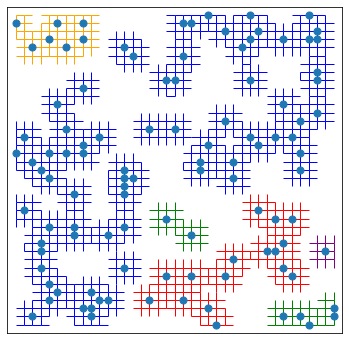

In [23]:
su.plot_many_graphs_on_grid(clusters_2, box_size = L0, fig_size = 6)

In [27]:
tic = time.time()
full_steiner_2 = su.improved_steiner(G_2, 
                                  box_size = L0, 
                                  condition = 'n_clusters <= 4', 
                                  sigma = 1.3, 
                                  verbosity = True)
toc = time.time()
print('Calculation took {} sec'.format(toc-tic))

Properties of the original graph: 
Number of clusters: 1; Number of nodes: 1521; Number of edges: 2964; Number of terminals: 108
For alpha =  0.01
Number of clusters: 69; Number of nodes: 225; Number of edges: 182; Number of terminals: 108
For alpha =  0.03
Number of clusters: 33; Number of nodes: 715; Number of edges: 1050; Number of terminals: 108
For alpha =  0.05
Number of clusters: 26; Number of nodes: 871; Number of edges: 1252; Number of terminals: 108
For alpha =  0.06999999999999999
Number of clusters: 12; Number of nodes: 925; Number of edges: 1349; Number of terminals: 108
For alpha =  0.09
Number of clusters: 12; Number of nodes: 966; Number of edges: 1455; Number of terminals: 108
For alpha =  0.11
Number of clusters: 9; Number of nodes: 1130; Number of edges: 1655; Number of terminals: 108
For alpha =  0.13
Number of clusters: 8; Number of nodes: 1166; Number of edges: 1712; Number of terminals: 108
For alpha =  0.15000000000000002
Number of clusters: 8; Number of nodes: 

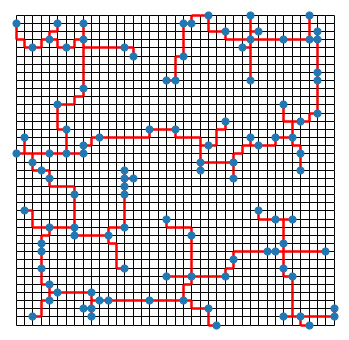

In [26]:
su.plot_graph_on_grid(G_2, box_size = L0, tree = full_steiner_2, fig_size = 6)

In [71]:
# for cl in [3, 2, 1]:
#     print('number of clusters: ', cl)
#     tic = time.time()

#     full_steiner_2 = su.improved_steiner(G_2, 
#                                       box_size = L0, 
#                                       condition = 'n_clusters <= '+str(cl), 
#                                       sigma = 1, 
#                                       verbosity = False)

#     toc = time.time()
#     print('Calculation took {} sec'.format(toc-tic))
#     print('\n')